In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('911_calls_for_service.csv')
df.head()

,Unnamed: 0,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,0,2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,1,2015-07-13 10:47:00,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,2,2015-07-13 10:42:00,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,3,2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,4,2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"


In [3]:
df['priority'].value_counts()

Medium            1399431
Low                636380
High               434022
Non-Emergency      321619
Emergency            1004
Out of Service        803
Name: priority, dtype: int64

<AxesSubplot:xlabel='priority', ylabel='count'>

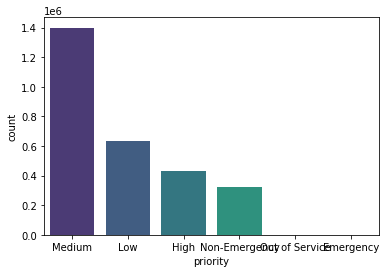

In [4]:
import seaborn as sns
sns.countplot(x='priority',data=df, palette='viridis')

In [5]:
df['callDateTime'].iloc[0]

'2015-07-13 10:41:00'

In [6]:
df['callDateTime']= pd.to_datetime(df['callDateTime'])

In [7]:
time=df['callDateTime'].iloc[0]
df['Hour']=df['callDateTime'].apply(lambda time:time.hour)
df['Month']=df['callDateTime'].apply(lambda time:time.month)
df['Day of Week']=df['callDateTime'].apply(lambda time:time.dayofweek)

In [8]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

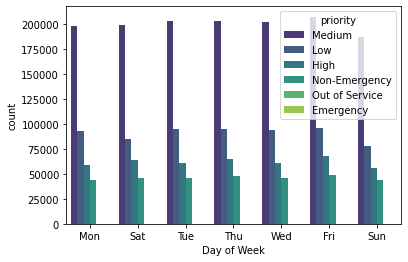

In [9]:
sns.countplot(x='Day of Week',data=df, hue='priority',palette='viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

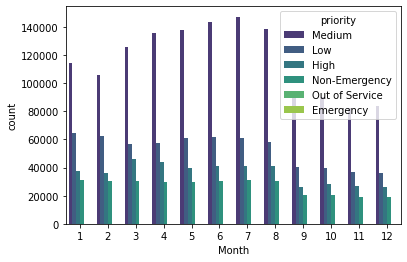

In [10]:
sns.countplot(x='Month',data=df, hue='priority',palette='viridis')

In [11]:
byMonth=df.groupby('Month').count()
byMonth.head()

,Unnamed: 0,callDateTime,priority,district,description,callNumber,incidentLocation,location,Hour,Day of Week
Month,,,,,,,,,,
1,248121,248121,248121,248121,248121,248121,248121,248121,248121,248121
2,234872,234872,234872,234872,234872,234872,234872,234872,234872,234872
3,258980,258980,258980,258980,258980,258980,258980,258980,258980,258980
4,268783,268783,266544,268783,268783,268783,268783,268783,268783,268783
5,273061,273061,268645,273061,273061,273061,273061,273061,273061,273061


<AxesSubplot:xlabel='Month'>

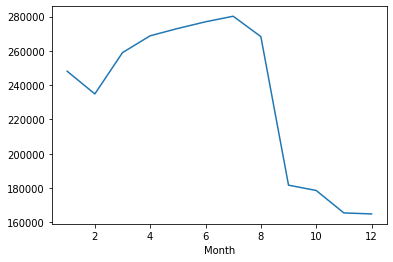

In [12]:
byMonth['incidentLocation'].plot()

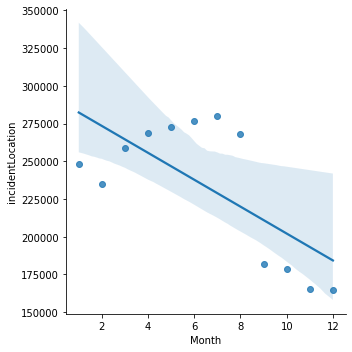

In [13]:
sns.lmplot(x='Month', y='incidentLocation',data=byMonth.reset_index())

In [14]:
df['Date']=df['callDateTime'].apply(lambda p:p.date())

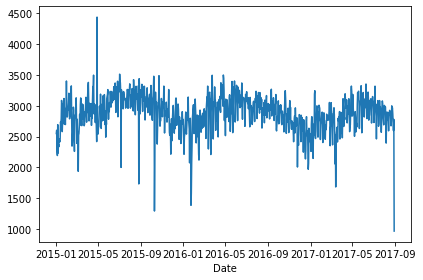

In [15]:
df.groupby('Date').count()['incidentLocation'].plot()
plt.tight_layout()

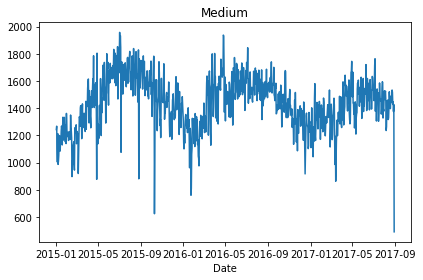

In [16]:
df[df['priority']=='Medium'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Medium')
plt.tight_layout()

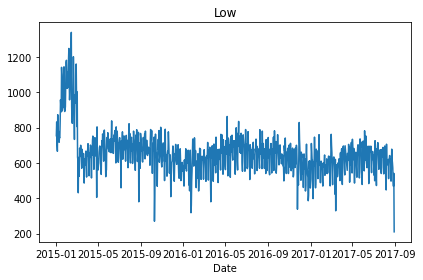

In [17]:
df[df['priority']=='Low'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Low')
plt.tight_layout()

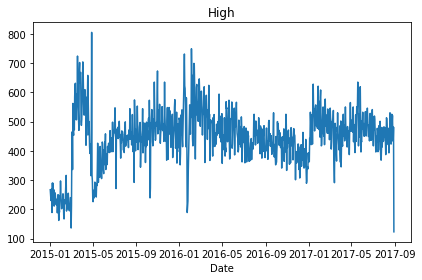

In [20]:
df[df['priority']=='High'].groupby('Date').count()['incidentLocation'].plot()
plt.title('High')
plt.tight_layout()

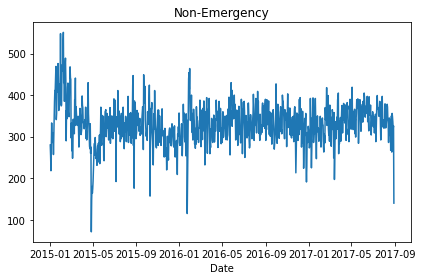

In [21]:
df[df['priority']=='Non-Emergency'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Non-Emergency')
plt.tight_layout()

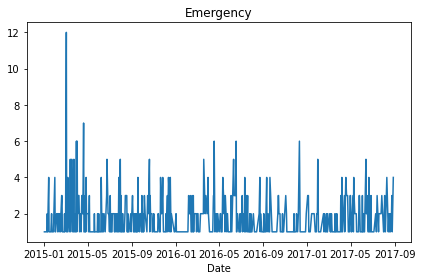

In [22]:
df[df['priority']=='Emergency'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Emergency')
plt.tight_layout()

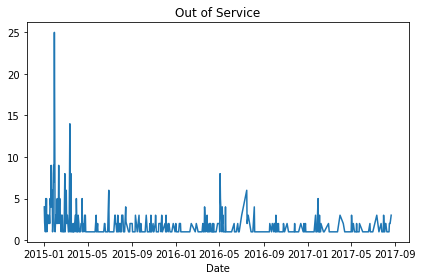

In [23]:
df[df['priority']=='Out of Service'].groupby('Date').count()['incidentLocation'].plot()
plt.title('Out of Service')
plt.tight_layout()

In [24]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['priority'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,14122,10712,8941,6909,5644,5432,6981,11407,16206,17395,...,23735,23807,24309,25194,25284,23698,23062,23145,21942,20705
Mon,12307,9598,7703,5743,4791,4785,6321,10360,15051,16770,...,22643,23599,25012,25784,24338,22880,22050,20626,18054,15625
Sat,17865,15041,13426,9490,7383,6204,6161,7992,11735,14811,...,21132,20444,20260,21318,21497,21029,21567,22150,21279,19787
Sun,17448,15216,12949,9377,6777,5224,5082,6622,9501,12180,...,20141,19718,20763,21728,21446,20772,20253,19670,17745,15702
Thu,13059,10008,8164,6176,5213,5288,7097,11122,16010,17653,...,23755,24193,25212,26644,25123,23018,22467,21705,19306,17401


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

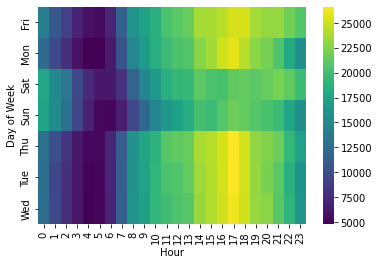

In [25]:
sns.heatmap(dayHour,cmap='viridis')

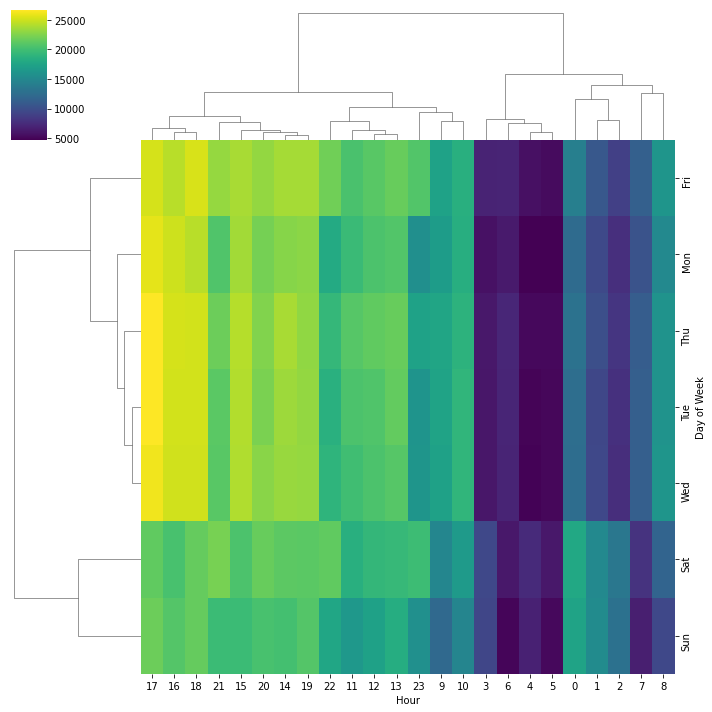

In [26]:
sns.clustermap(dayHour,cmap='viridis')

In [27]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['priority'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,40598,35601,37879,40540,39642,41585,43445,36679,28590,28004,23451,24096
Mon,33555,34581,35980,35157,39737,40041,37705,41669,23527,25476,24255,21567
Sat,36406,33032,32685,41902,36651,36573,41634,38934,24576,26908,22113,23007
Sun,33508,30067,31870,35350,36386,34377,39225,35872,22635,23165,23410,19315
Thu,36977,35121,40812,38371,35591,43501,40635,36635,27367,27352,21197,27700


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

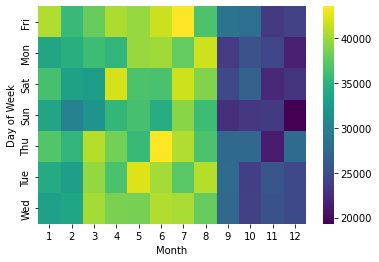

In [28]:
sns.heatmap(dayMonth,cmap='viridis')

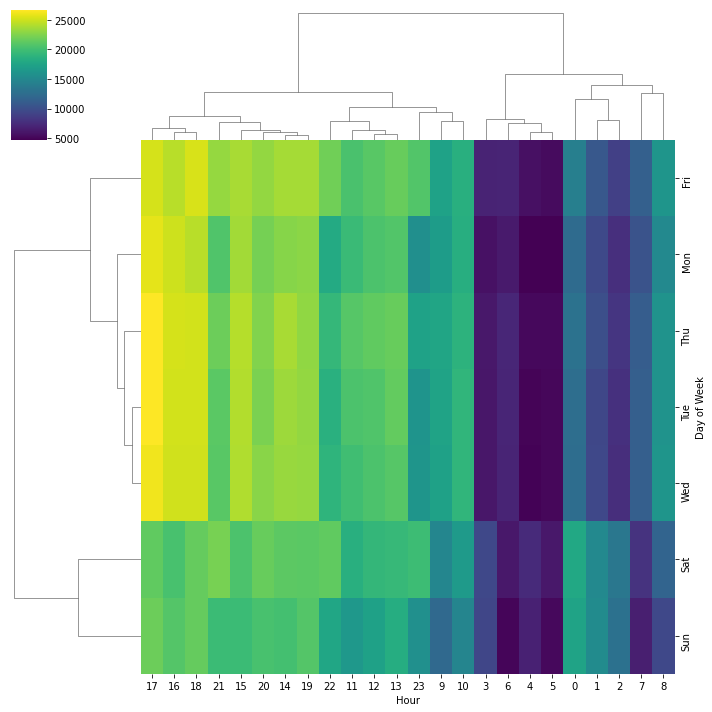

In [29]:
sns.clustermap(dayHour, cmap='viridis')